In [1]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from scipy.interpolate import splev, splprep
from torch.utils.data import ConcatDataset, DataLoader,Dataset
import random
import os
from PIL import Image,ImageDraw
import sys
sys.path.append('../')

import data_loader as dl


/Users/giuliamonopoli/opt/anaconda3/envs/deepvalve/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


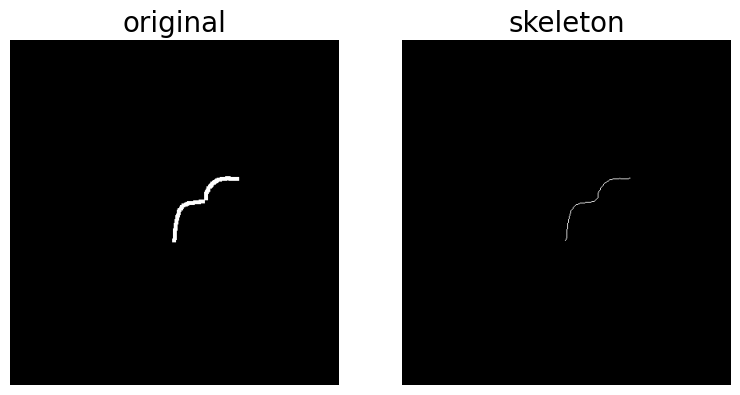

In [83]:
from PIL import Image 
import rdp
from skimage.morphology import skeletonize

mask_path = "/Users/giuliamonopoli/Desktop/PhD /deepvalve/data/segmentation_data/segmentation_lines_30_2/train/masks/image_25.png"

mask = Image.open(mask_path)
from rdp import rdp
mask = np.array(mask).astype(float)
# coords = np.column_stack(np.where(mask > 0))
# plt.scatter(coords[:,0],coords[:,1])
# plt.show()
skeleton = skeletonize(mask)
# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(mask, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)                                                              

fig.tight_layout()
plt.show()         
# coords = np.column_stack(np.where(skeleton > 0))
# plt.scatter(coords[:,0],coords[:,1])
# plt.show()
# array = skeleton.astype(float)
# array.shape
# coord =rdp(array.reshape(-1,2))

In [67]:
diffMaskNewArray = np.transpose(np.nonzero(skeleton))
diffMaskNewArray.shape
type(diffMaskNewArray)
# diffMaskNewArray = np.transpose(diffMaskNewArray,(1,0))
# mask = rdp(diffMaskNewArray, algo="iter", return_mask=True)

# # diffMaskNewArray[mask].shape
# plt.scatter(diffMaskNewArray[mask][:,1],diffMaskNewArray[mask][:,0])


numpy.ndarray

In [70]:
def get_spline_pts(leaf_pts, num_pts=20):
    """
    Generate spline points based on the given leaf points.

    Parameters:
        leaf_pts (array_like): The input leaf points.
        num_pts (int, optional): The number of points to generate on the spline. Default is 10.

    Returns:
        array_like: The spline points.

    Notes:
        - The function uses `splprep` to obtain a B-spline representation of the curve that passes through the given points.
        - The B-spline representation consists of three elements: knots, coefficients, and the degree of the spline.
        - The knots define the curve, the coefficients are the weights of the curve, and the degree is the degree of the polynomial that defines the curve.
        - The function uses `splev` to evaluate the B-spline representation and obtain the points on the curve.

    """
    tck, u = splprep(leaf_pts.T, s=0, k=min(3, len(leaf_pts) - 1))
    x = np.linspace(u.min(), u.max(), num_pts)
    
    y = np.array(splev(x, tck, der=0))
    return y.T

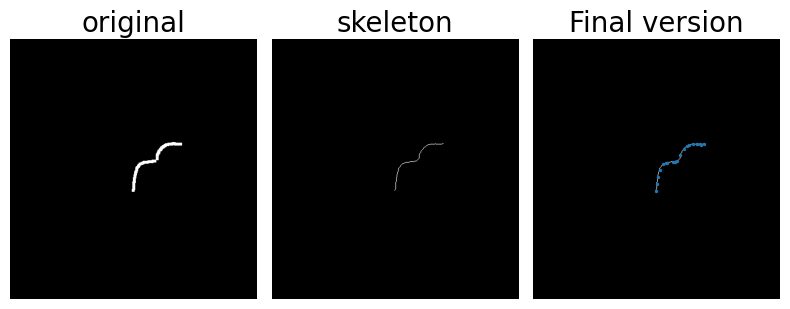

In [87]:
test = get_spline_pts(diffMaskNewArray)

# plt.imshow(skeleton, cmap=plt.cm.gray)
# plt.scatter(test[:,1],test[:,0],marker='o',s=2)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(mask, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)                                                              

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].scatter(test[:,1],test[:,0],marker='o',s=2)
ax[2].axis('off')
ax[2].set_title('Final version', fontsize=20)    
fig.tight_layout()
plt.show()   

